### İmporting Libraires

In [198]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

### Data Analysis

In [199]:
df_original = pd.read_csv("insurance.csv")

In [200]:
df_original.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [201]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


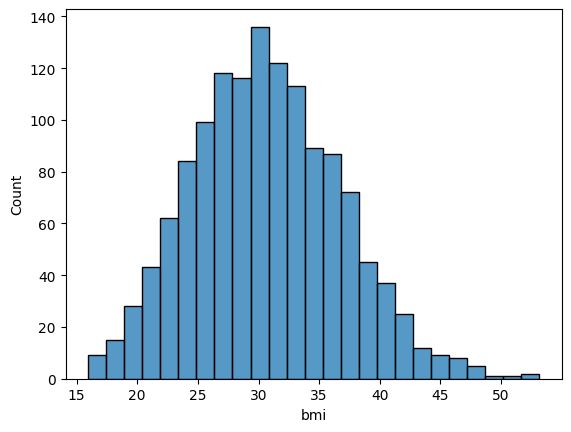

In [202]:
sns.histplot(data = df_original, x = "bmi")
plt.show() # normal distribution

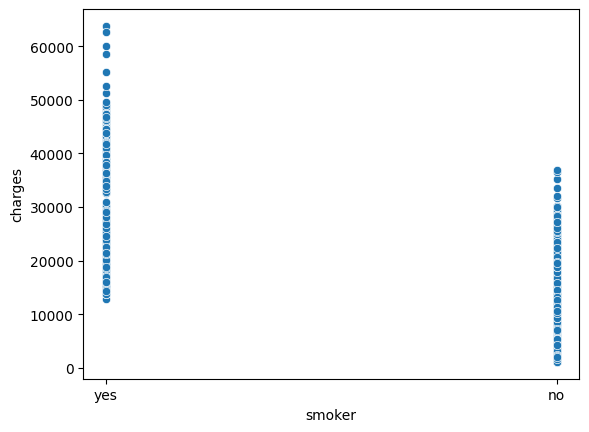

In [203]:
sns.scatterplot(data = df_original, x = "smoker", y= "charges") 
plt.show()

In [204]:
# Sigara içenler daha fazla insurance ücreti veriyorlar diyebiliriz

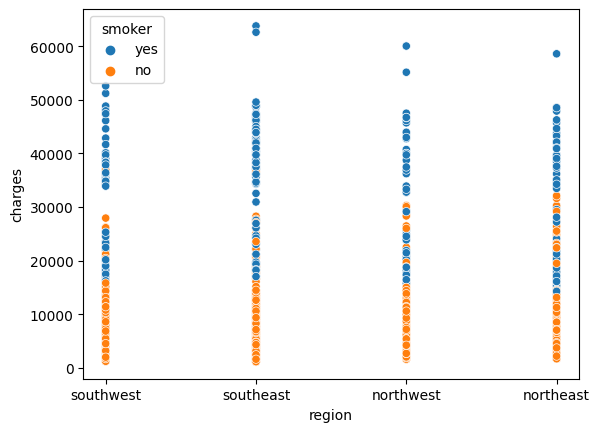

In [205]:
sns.scatterplot(data = df_original, x = "region", y= "charges", hue = "smoker") 
plt.show()

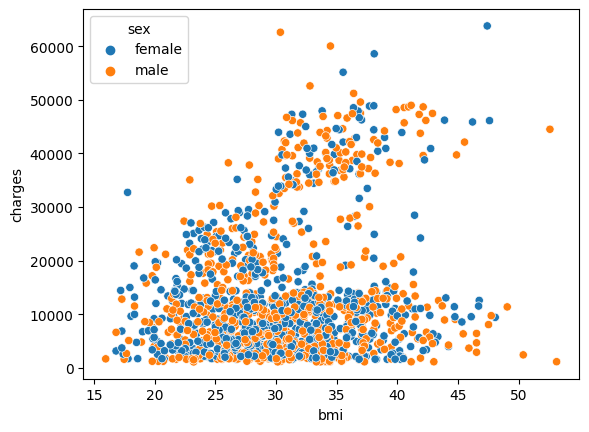

In [206]:
sns.scatterplot(data = df_original, x = "bmi", y= "charges", hue = "sex") 
plt.show()

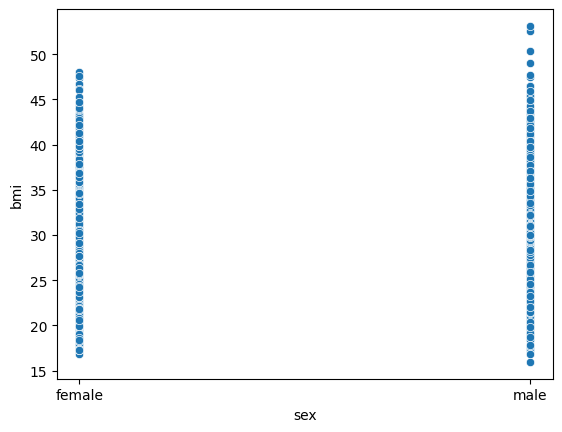

In [207]:
sns.scatterplot(data = df_original, x = "sex", y= "bmi") 
plt.show()

In [208]:
df_original.groupby("region")["children"].count()

region
northeast    324
northwest    325
southeast    364
southwest    325
Name: children, dtype: int64

In [209]:
# southeast en fazla çocuğa sahipmiş buna rağmen yukarıdaki grafikte diğerleriyle aynı oranda dağılım gösterdiğini inceledim yani
# fiyata çok fazla etkisi olan bir özellik değil.

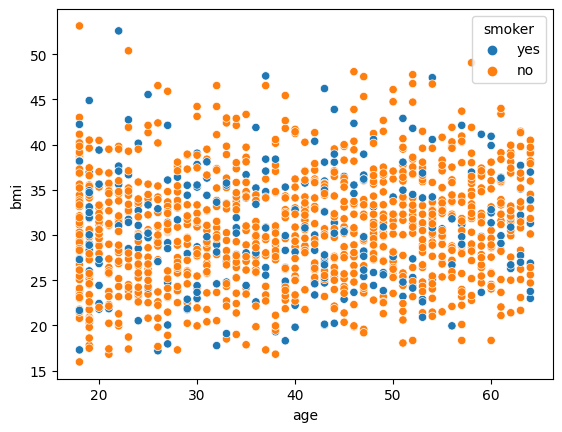

In [210]:
sns.scatterplot(data = df_original, x = "age", y= "bmi", hue = "smoker") 
plt.show()

In [211]:
# her yaştan her türlü bmi var

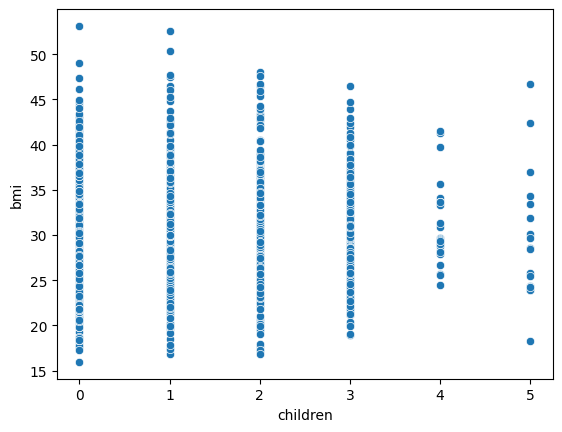

In [212]:
sns.scatterplot(data = df_original, x = "children", y= "bmi") 
plt.show()

In [213]:
# 3 ten fazla çocuğu olanların bmi' ı normale göre daha düşük görünüyor veri azlığından mı kaynaklı yoksa bir ilişki var diyebilir miyiz? 

<AxesSubplot: xlabel='bmi'>

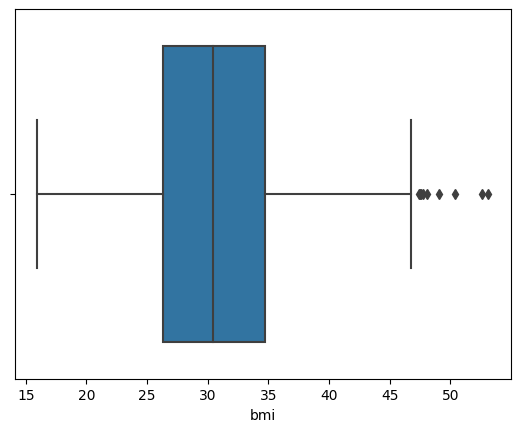

In [214]:
sns.boxplot(data = df_original, x = "bmi")

In [215]:
# bmi özelliğinde outlierlar var bunlarla nasıl ilgileneceğiz?

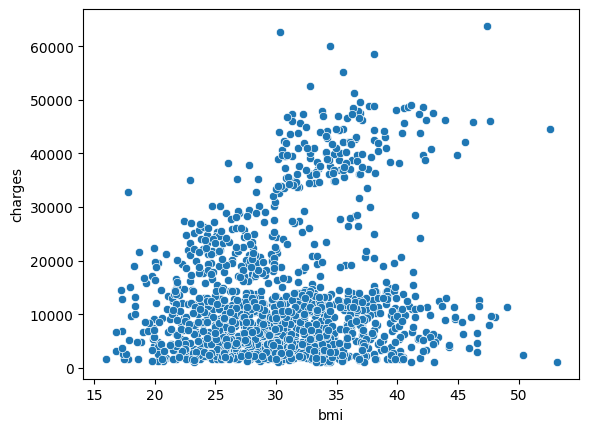

In [216]:
sns.scatterplot(data = df_original, x = "bmi", y= "charges") 
plt.show()

In [217]:
# bmi ve charges arasında linear bir ilişki göremedim

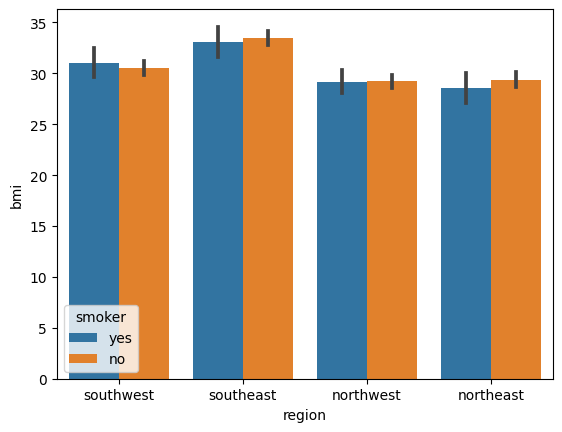

In [218]:
sns.barplot(data= df_original, x = "region", y= "bmi", hue= "smoker")
plt.show()

In [219]:
# en büyük bmi southeast bölgesinde

C:\Users\4242o\AppData\Local\Temp\ipykernel_5868\1554721358.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_original.corr(), annot = True)


<AxesSubplot: >

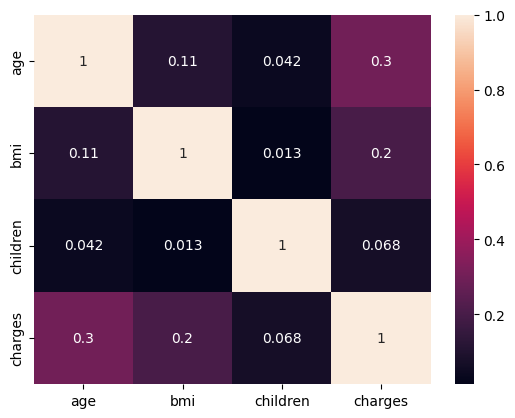

In [220]:
sns.heatmap(df_original.corr(), annot = True)

In [221]:
# hedef değikenimizle büyük bir ilişiği olan pek özellik yok

### Data Preprocessing

In [222]:
cat_col = list(df_original.select_dtypes(include = "object"))
cat_col

['sex', 'smoker', 'region']

In [223]:
label_encoder = LabelEncoder()
for i in range(3):
    encoded_categories = label_encoder.fit_transform(df_original[cat_col[i]])
    df_original[cat_col[i]] = encoded_categories
    print(encoded_categories)

[0 1 1 ... 0 0 0]
[1 0 0 ... 0 0 1]
[3 2 2 ... 2 3 1]


In [224]:
df_original

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [225]:
X = df_original.drop("charges", axis = 1)
y =  df_original["charges"]

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [227]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,0
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


In [228]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [229]:
"""scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(X_train)
scaled_test_data = scaler.transform(X_test)"""

'scaler = MinMaxScaler()\nscaled_train_data = scaler.fit_transform(X_train)\nscaled_test_data = scaler.transform(X_test)'

In [230]:
#scaled_train_data

In [231]:
#X_train[:] =  scaled_train_data
#X_test[:] = scaled_test_data

In [232]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,1
1285,47,0,24.320,0,0,0
1142,52,0,24.860,0,0,2
969,39,0,34.320,5,0,2
486,54,0,21.470,3,0,1
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,0
1130,39,0,23.870,5,0,2
1294,58,1,25.175,0,0,0
860,37,0,47.600,2,1,3


In [233]:
X_test

,age,sex,bmi,children,smoker,region
764,45,0,25.175,2,0,0
887,36,0,30.020,0,0,1
890,64,0,26.885,0,1,1
1293,46,1,25.745,3,0,1
259,19,1,31.920,0,1,1
...,...,...,...,...,...,...
109,63,1,35.090,0,1,2
575,58,0,27.170,0,0,1
535,38,1,28.025,1,0,0
543,54,0,47.410,0,1,2


In [234]:
linear_model = LinearRegression()

In [235]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [236]:
preds = linear_model.predict(X_test)

In [237]:
r2_score(y_test, preds)

0.7833463107364539

In [238]:
mean_squared_error(y_test, preds)**0.5

5799.587091438356

In [239]:
mean_absolute_error(y_test, preds)

4186.508898366432

### Random forest model

In [240]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [241]:
rf_regressor = RandomForestRegressor(n_estimators=20, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=42)

In [242]:
rf_preds = rf_regressor.predict(X_test)

In [243]:
r2_score(y_test, rf_preds)

0.8586083723902781

In [244]:
cross_val_score(rf_regressor , X_test , y_test , cv= 5).mean()

0.8502052465122889

### Optimization of parameter

In [245]:
from sklearn.model_selection import RandomizedSearchCV

In [246]:
rf_tuned_model = RandomForestRegressor()

In [247]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [4,5,6,7,8,9],
    'max_features': [2,3,4,5,6]
}

In [248]:
rand_search = RandomizedSearchCV(estimator= rf_tuned_model, param_distributions= param_grid, n_iter= 50, cv=5)

In [249]:
rand_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9],
                                        'max_features': [2, 3, 4, 5, 6],
                                        'n_estimators': [50, 100, 200]})

In [250]:
rand_search.best_params_

{'n_estimators': 200, 'max_features': 5, 'max_depth': 4}

In [251]:
rf_model = rand_search.best_estimator_

In [252]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=4, max_features=5, n_estimators=200)

In [253]:
train_preds = rf_model.predict(X_train)

In [254]:
r2_score(y_train, train_preds)

0.8721301160967548

In [255]:
test_preds = rf_model.predict(X_test)

In [258]:
r2_score(y_test, test_preds)

0.8735524613592296

In [260]:
cross_val_score(rf_model , X_test , y_test , cv= 5).mean()

0.8667751052168271